In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_directory = os.path.join(os.getcwd(),"dataset")

In [17]:
train_data = pd.read_csv(os.path.join(dataset_directory,"train.csv"))
test_data = pd.read_csv(os.path.join(dataset_directory,"test.csv"))
print("train shape: ",train_data.shape)
print("train shape: ",test_data.shape)
print("Is the text columns has NA values:",train_data['text'].isna().any())

train shape:  (7613, 5)
train shape:  (3263, 4)
Is the text columns has NA values: False


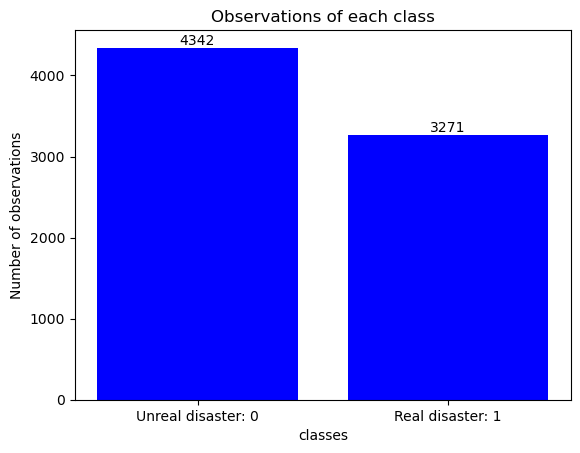

In [4]:
obs = train_data['target'].value_counts().to_dict()
bars = plt.bar(['Unreal disaster: 0','Real disaster: 1'],obs.values(),color='blue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
plt.title("Observations of each class")
plt.xlabel("classes")
plt.ylabel("Number of observations")
plt.show()

Mean: 101.04
Median: 107.0
Min: 7
Max: 157


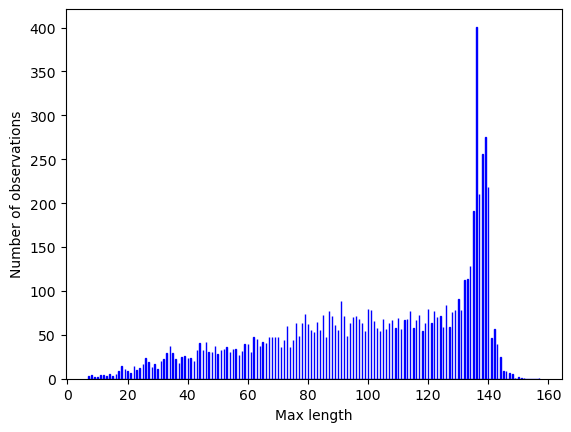

In [19]:
text = train_data['text']
text = list(text)
lengths = [len(sent) for sent in text]

def describe(arr:list):
    mean = np.mean(arr)
    median = np.median(arr)
    min_arr = np.min(arr)
    max_arr = np.max(arr)

    print(f"Mean: {mean:.2f}\nMedian: {median}\nMin: {min_arr}\nMax: {max_arr}")

    return {"mean":mean,
            "median":median,
            "min":min_arr,
            "max":max_arr}

value = describe(lengths)

plt.hist(lengths,bins=1000,edgecolor='blue')
plt.ylabel('Number of observations')
plt.xlabel('Max length')
plt.show()

In [21]:
def top_words_in_column(data_frame, column_name):
    word_counts = data_frame[column_name].str.split(expand=True).stack().value_counts()
    top_10_words = word_counts.head(10)
    return top_10_words

print("Top 10 words has the biggest frequency")
top_words_in_column(train_data,'text')

Top 10 words has the biggest frequency


the    2575
a      1845
to     1805
in     1757
of     1722
and    1302
I      1197
for     820
is      814
on      773
dtype: int64